# Grade Elevation Changes By Neighborhood

## Kroehler, Sodi's Analysis Notebook

This document looks at the amounts of grade elevation changes, as marked by stairs, per neighbourhood. 

First, I loaded a dataset containing all public stairs in the greater Pittsburg area.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

stairs = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")

In [2]:
stairs.describe()

,id,length,number_of_steps,schools_count,school_score,total_population,transit_rider_count,transit_score,detour_score,overall_score,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
count,1.107000e+03,870.000000,753.000000,566.000000,565.000000,566.000000,566.000000,566.000000,566.000000,573.000000,1106.000000,1106.000000,1.107000e+03,1106.000000,1106.000000,1106.000000,1107.000000,1107.000000
mean,1.082821e+09,166.274713,51.564409,0.376325,68.378761,669.818021,109.632509,5.787986,5.049470,5.551483,3.868897,18.009946,4.200330e+10,3.213382,18.009946,3.358951,40.440109,-79.987495
std,6.235377e+08,130.970799,49.652558,0.584221,44.493783,345.301085,164.775511,2.839219,3.054263,2.887074,2.262420,7.089147,2.450798e+05,1.547335,7.089147,1.695481,0.026940,0.041401
min,7.002735e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,40.370555,-80.074649
25%,5.447600e+08,93.000000,18.000000,0.000000,8.000000,422.000000,18.250000,4.000000,2.000000,3.000000,2.000000,14.000000,4.200316e+10,2.000000,14.000000,2.000000,40.420996,-80.018708
50%,1.064159e+09,129.500000,38.000000,0.000000,100.000000,659.000000,65.000000,6.000000,5.000000,6.000000,3.000000,19.000000,4.200319e+10,3.000000,19.000000,3.000000,40.438320,-79.991694
75%,1.630364e+09,217.750000,72.000000,1.000000,100.000000,876.000000,137.000000,8.000000,8.000000,8.000000,6.000000,24.000000,4.200332e+10,5.000000,24.000000,5.000000,40.461730,-79.960095
max,2.145741e+09,1235.000000,378.000000,4.000000,100.000000,2438.000000,1643.000000,10.000000,10.000000,10.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,40.494544,-79.871379


In [3]:
stairs_by_length = stairs.loc[:,["neighborhood", "length"]].groupby("neighborhood").sum()
stairs_by_length

,length
neighborhood,
Allegheny Center,0.0
Allegheny West,0.0
Allentown,1361.0
Arlington,1836.0
Banksville,1549.0
...,...
Upper Lawrenceville,2358.0
West End,601.0
West Oakland,281.0


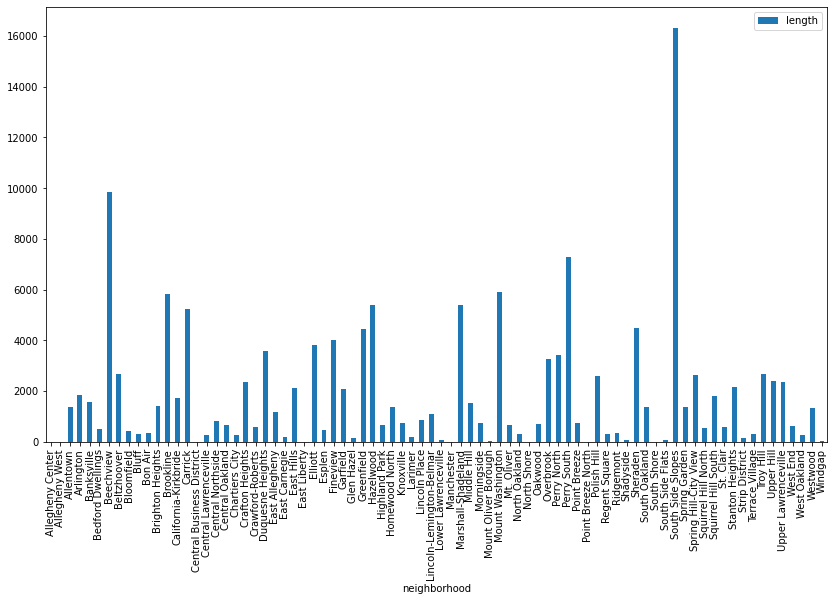

In [4]:
stairs_by_length.plot(kind='bar', figsize=(14,8))

Well that's just tremendously helpful. Let's do the top 25 longest lengths are, and then reduce our graph to just those:

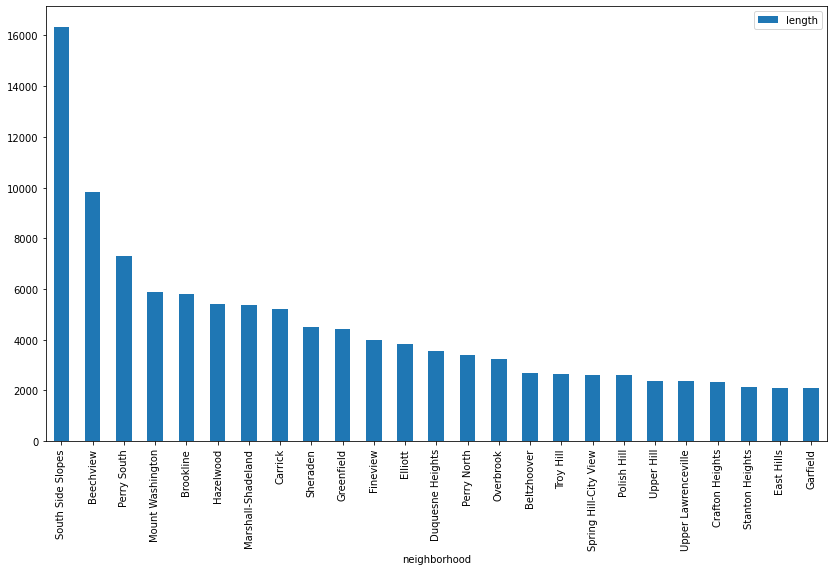

In [5]:
top_five = stairs_by_length.sort_values(by = "length", ascending = False)[0:25]
top_five.plot(kind = "bar", figsize=(14,8))

Well wouldn't you know - the neighborhood called "Slopes" has some slopes. Okay but that's just the length of the stairs - we still don't know if that means the population is more physically fit there. I mean, maybe there's just a guy there who really like stairs, and there's just stair models everywhere?  
![stairs!](links/stairs.jpg)  
So let's divide the total lengths of the stairs by the respective populations of those neighborhoods:

In [8]:
hoods = dict()
for item,row in stairs.iterrows():
    n = row["neighborhood"]
    pop = row["total_population"]
    if n not in hoods:
        hoods[n] = pop

In [9]:
stairs_by_pop = stairs[["neighborhood", "length","total_population"]].groupby("neighborhood").sum()
stairs_by_pop["weighted_length"] = (stairs_by_pop.length / hoods[stairs_by_pop.neighborhood])
top_five_weighted = stairs_by_pop.sort_values(by = "length", ascending = False)[0:5]
top_five_weighted

AttributeError: 'DataFrame' object has no attribute 'neighborhood'

That didn't help at all. 